In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Importing Required Libraries for the Project
import numpy as np
import pandas as pd 
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier

In [3]:
#Loading the dataset
cardio_vascular_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/cardio_train.csv", delimiter=";")
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


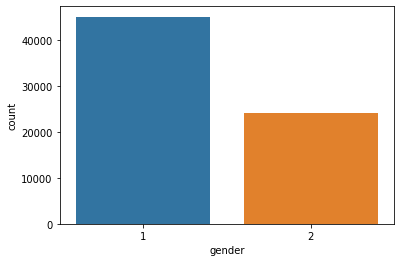

In [4]:
sns.countplot(cardio_vascular_data['gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


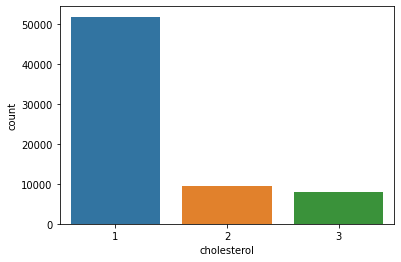

In [5]:
sns.countplot(cardio_vascular_data['cholesterol'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


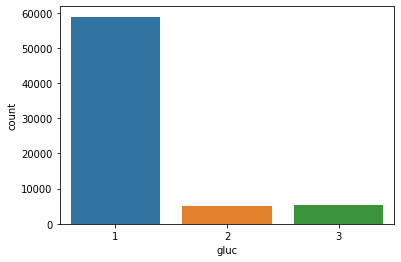

In [6]:
sns.countplot(cardio_vascular_data['gluc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


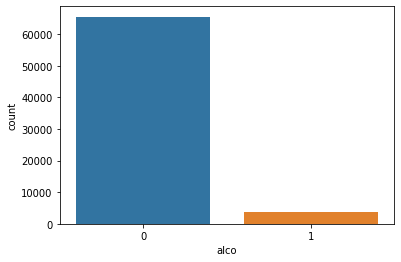

In [7]:
sns.countplot(cardio_vascular_data['alco'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


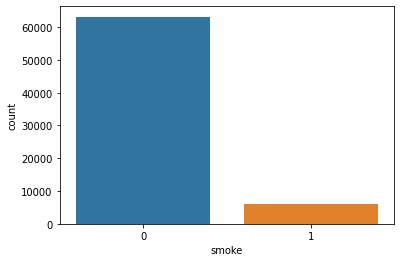

In [8]:
sns.countplot(cardio_vascular_data['smoke'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


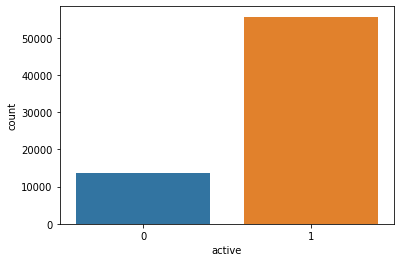

In [9]:
sns.countplot(cardio_vascular_data['active'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


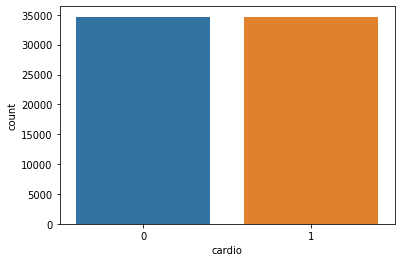

In [10]:
sns.countplot(cardio_vascular_data['cardio'])

# Data Preprocessing

In [11]:
#Checking the datatypes for all the attributes in the dataset
cardio_vascular_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
#Checking for null values in the dataset
cardio_vascular_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
#Checking for the starting and ending values to find out the outliers present in the dataset
cardio_vascular_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Age attribute is in the form of number of days. So, converting age to number of years.
cardio_vascular_data['age'] = cardio_vascular_data['age']/365.25

In [15]:
#Dropping the data entries where ap_hi and ap_lo are out of range.
cardio_vascular_data.drop(cardio_vascular_data.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [16]:
#Displaying the top 5 entries from the datatset to check if the data is preprocessed properly.
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.516769,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.104038,1,163,71.0,110,70,1,1,0,0,1,1
2,990,59.961670,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.832991,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.046543,1,155,62.0,120,80,1,1,0,0,1,0


# Correlation Matrix Plot 

### Correlation Matrix Visualization without Values 

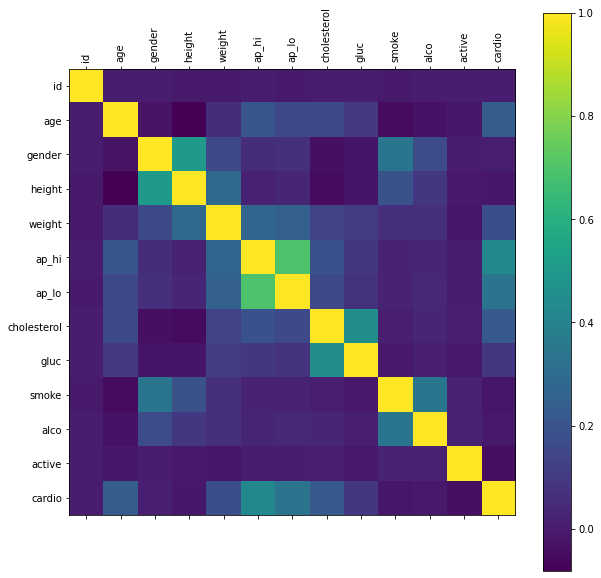

In [17]:
#Correlation matrix for finding out which attributes(features) are correlated.
rcParams['figure.figsize'] = 10,10
plt.matshow(cardio_vascular_data.corr())
plt.yticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns ,rotation='horizontal')
plt.xticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns, rotation='vertical')
plt.colorbar()

### Correlation Matrix Visualization with Values 

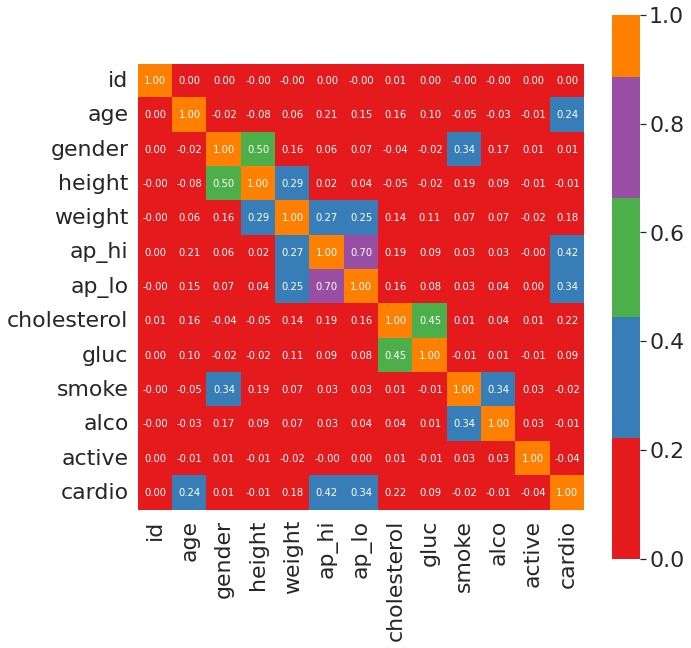

In [18]:
corrmat = cardio_vascular_data.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=2)
hm = sns.heatmap(corrmat,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = cardio_vascular_data.columns, xticklabels = cardio_vascular_data.columns)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febbad34990>,
      dtype=object)

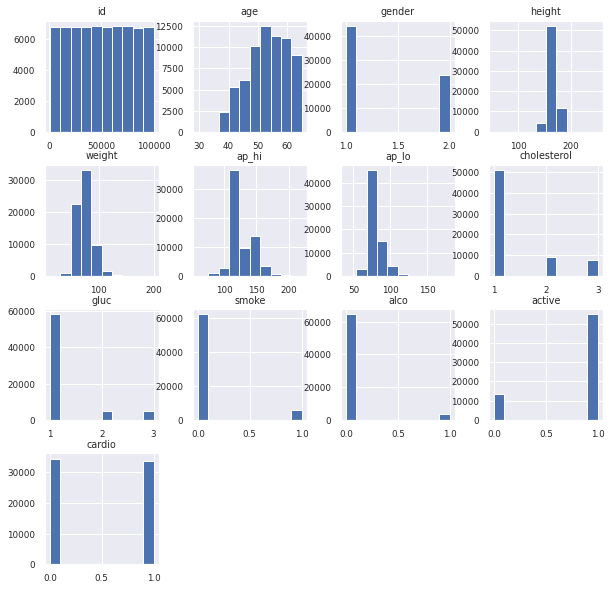

In [65]:
sns.set(font_scale=0.8)
cardio_vascular_data.hist()

In [21]:
#Dropping attribute "id" as it is not important for classifying the CVD 
#and setting X(input features) and y(target variable) for using the classification model on the data.
cardio_vascular_data.drop(['id'], axis=1)
X = cardio_vascular_data.drop(['cardio'], axis=1)
y = cardio_vascular_data['cardio']

# Applying Machine Learning Model to the Processed Data 

# 1. Random Forest Classifier 

In [46]:
#Splitting the dataset into training and testing dataset.
#Tried Random Forest Classifier model for different number of Decision Trees.

acc__train_rfc = []
y_pred_train_rfc = []
acc__test_rfc = []
y_pred_test_rfc = []
cnt = 0

no_of_decision_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .66)

for i in no_of_decision_trees:
  random_forest_model = RandomForestClassifier(n_estimators=i, max_depth=8, random_state=0)
  random_forest_model.fit(X_train, y_train)
  y_pred_train_rfc.append(random_forest_model.predict(X_train))
  y_pred_test_rfc.append(random_forest_model.predict(X_test))

  acc__train_rfc.append(accuracy_score(y_train, y_pred_train_rfc[cnt]))
  acc__test_rfc.append(accuracy_score(y_test, y_pred_test_rfc[cnt]))

  cnt += 1

In [47]:
#Printing Training and Testing Accuracies for different number of decision trees.

for i in range(0,20):
  print("\nTraining and Testing Accuracy for ", no_of_decision_trees[i]," Decision Trees: ")
  print("Training Accuracy: ", acc__train_rfc[i])
  print("Testing Accuracy: ", acc__test_rfc[i])


Training and Testing Accuracy for  10  Decision Trees: 
Training Accuracy:  0.7397284665034498
Testing Accuracy:  0.7315850866202964

Training and Testing Accuracy for  20  Decision Trees: 
Training Accuracy:  0.7397284665034498
Testing Accuracy:  0.7328811509050849

Training and Testing Accuracy for  30  Decision Trees: 
Training Accuracy:  0.7402848876029379
Testing Accuracy:  0.7327947466194323

Training and Testing Accuracy for  40  Decision Trees: 
Training Accuracy:  0.7413977298019141
Testing Accuracy:  0.7325787359053009

Training and Testing Accuracy for  50  Decision Trees: 
Training Accuracy:  0.7415312708657912
Testing Accuracy:  0.7333995766190003

Training and Testing Accuracy for  60  Decision Trees: 
Training Accuracy:  0.7412196750500779
Testing Accuracy:  0.7328811509050849

Training and Testing Accuracy for  70  Decision Trees: 
Training Accuracy:  0.7415757845537503
Testing Accuracy:  0.7323195230483432

Training and Testing Accuracy for  80  Decision Trees: 
Train

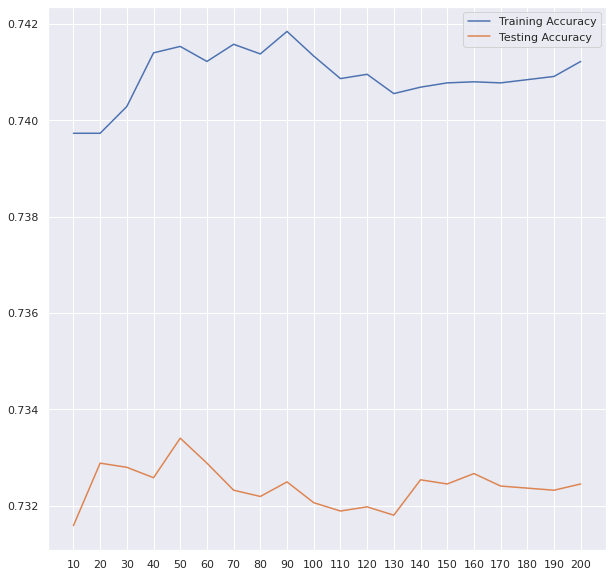

In [48]:
#Plotting Training and Testing Accuracies for different number of decision trees.

labels = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],labels)
plt.plot(acc__train_rfc,label='Training Accuracy')
plt.plot(acc__test_rfc,label='Testing Accuracy')
plt.legend()

In [51]:
#Printing Testing and Training Accuracy and Confusion Matrix for the best number of decision trees.
#i.e. For the number of decision trees that has highest testing accuracy in Random Forest Classifier.

max_test_accuracy = max(acc__test_rfc)
index = acc__test_rfc.index(max_test_accuracy)
print("Maximum Testing Accuracy found for ", no_of_decision_trees[index], "Decision Trees.")
print("\nTraining Accuracy: ", acc__train_rfc[index])
print("Testing Accuracy: ", acc__test_rfc[index])

print("\n\nConfusion Matrix for the Training Dataset")
print(confusion_matrix(y_train, y_pred_train_rfc[index]))
print("\n\nConfusion Matrix for the Testing Dataset")
print(confusion_matrix(y_test, y_pred_test_rfc[index]))

Maximum Testing Accuracy found for  50 Decision Trees.

Training Accuracy:  0.7415312708657912
Testing Accuracy:  0.7333995766190003


Confusion Matrix for the Training Dataset
[[18282  4323]
 [ 7290 15035]]


Confusion Matrix for the Testing Dataset
[[9397 2392]
 [3779 7579]]


# 2. Logistic Regression

In [ ]:
#Using Logistic Regression model for prediction.

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_train_lgr = pd.Series(logreg.predict(X_train))
y_pred_test_lgr = pd.Series(logreg.predict(X_test))

print("Confusion Matrix for the Training Dataset")
print(confusion_matrix(y_train, y_pred_train_lgr))
print("\n\nConfusion Matrix for the Testing Dataset")
print(confusion_matrix(y_test, y_pred_test_lgr))

acc_train_lgr = accuracy_score(y_train, y_pred_train_lgr)
print("\n\nTraining Accuracy: ", acc_train_lgr)
acc_test_lgr = accuracy_score(y_test, y_pred_test_lgr)
print("Testing Accuracy: ", acc_test_lgr)

Confusion Matrix for the Training Dataset
[[17235  5435]
 [ 7831 14429]]


Confusion Matrix for the Testing Dataset
[[8791 2933]
 [4064 7359]]


Training Accuracy:  0.7047407077676385
Testing Accuracy:  0.6977146066444896


# 3. K Nearest Neighbours

In [59]:
#Using kNN for classification for different values of k

k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y_pred_train_knn = []
y_pred_test_knn = []
acc_train_knn = []
acc_test_knn = []
cnt = 0

for i in k:
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(X_train, y_train)

  y_pred_train_knn.append(classifier.predict(X_train))
  y_pred_test_knn.append(classifier.predict(X_test))

  acc_train_knn.append(accuracy_score(y_train, y_pred_train_knn[cnt]))
  acc_test_knn.append(accuracy_score(y_test, y_pred_test_knn[cnt]))
  
  cnt += 1

In [62]:
#Printing Testing and Training Accuracies for different values of k.

for i in k:
  print("\nTraining and Testing Accuracy for k =", i)
  print("Training Accuracy: ", acc_train_knn[i-2])
  print("Testing Accuracy: ", acc_test_knn[i-2])


Training and Testing Accuracy for k = 2
Training Accuracy:  0.7969953260627644
Testing Accuracy:  0.6050028081392838

Training and Testing Accuracy for k = 3
Training Accuracy:  0.8064989984420209
Testing Accuracy:  0.6214196224132716

Training and Testing Accuracy for k = 4
Training Accuracy:  0.7525261517916759
Testing Accuracy:  0.625869443124379

Training and Testing Accuracy for k = 5
Training Accuracy:  0.7627197863342978
Testing Accuracy:  0.6303624659783125

Training and Testing Accuracy for k = 6
Training Accuracy:  0.7341197418206098
Testing Accuracy:  0.6313993174061433

Training and Testing Accuracy for k = 7
Training Accuracy:  0.7419986645893613
Testing Accuracy:  0.6349850952607249

Training and Testing Accuracy for k = 8
Training Accuracy:  0.7208769196527932
Testing Accuracy:  0.6333002116904999

Training and Testing Accuracy for k = 9
Training Accuracy:  0.7282884486979746
Testing Accuracy:  0.6372316066876917

Training and Testing Accuracy for k = 10
Training Accura

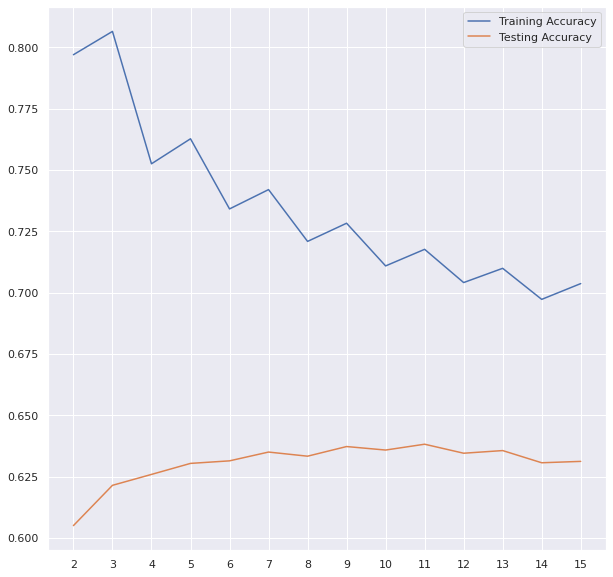

In [61]:
#Plotting Testing and Training Accuracies for different values of k.

labels = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels)
plt.plot(acc_train_knn,label='Training Accuracy')
plt.plot(acc_test_knn,label='Testing Accuracy')
plt.legend()

In [63]:
#Printing Testing and Training Accuracy and Confusion Matrix for the best value of k.
#i.e. For the value of k that has highest testing accuracy in kNN.

max_test_accuracy = max(acc_test_knn)
index = acc_test_knn.index(max_test_accuracy)
print("Maximum Testing Accuracy found for value of k =", k[index])
print("\nTraining Accuracy: ", acc_train_knn[index])
print("Testing Accuracy: ", acc_test_knn[index])

print("\n\nConfusion Matrix for the Training Dataset")
print(confusion_matrix(y_train, y_pred_train_knn[index]))
print("\n\nConfusion Matrix for the Testing Dataset")
print(confusion_matrix(y_test, y_pred_test_knn[index]))

Maximum Testing Accuracy found for value of k = 11

Training Accuracy:  0.7176496772757623
Testing Accuracy:  0.6381820538298699


Confusion Matrix for the Training Dataset
[[17773  4832]
 [ 7854 14471]]


Confusion Matrix for the Testing Dataset
[[8397 3392]
 [4983 6375]]


# 4. Support Vector Classifier (LinearSVC)

In [ ]:
support_vector_classifier = svm.LinearSVC(dual=False) 
support_vector_classifier.fit(X_train,y_train)

y_pred_train_svc = support_vector_classifier.predict(X_train) 
y_pred_test_svc = support_vector_classifier.predict(X_test)

print("Confusion Matrix for the Training Dataset") 
print(confusion_matrix(y_train, y_pred_train_svc)) 
print("\n\nConfusion Matrix for the Testing Dataset") 
print(confusion_matrix(y_test, y_pred_test_svc))

acc_train_svc = accuracy_score(y_train, y_pred_train_svc) 
print("\n\nTraining Accuracy: ", acc_train_svc) 
acc_test_svc = accuracy_score(y_test, y_pred_test_svc) 
print("Testing Accuracy: ", acc_test_svc)

Confusion Matrix for the Training Dataset
[[17502  5168]
 [ 7605 14655]]


Confusion Matrix for the Testing Dataset
[[8943 2781]
 [3921 7502]]


Training Accuracy:  0.7157133318495438
Testing Accuracy:  0.7104592387782434


# 5. XG-Boost Classifier (eXtreme Gradient Boosting)

In [ ]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train,y_train)

y_pred_train_xgb = xgb_classifier.predict(X_train) 
y_pred_test_xgb = xgb_classifier.predict(X_test)

print("Confusion Matrix for the Training Dataset") 
print(confusion_matrix(y_train, y_pred_train_xgb)) 
print("\n\nConfusion Matrix for the Testing Dataset") 
print(confusion_matrix(y_test, y_pred_test_xgb))

acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb) 
print("\n\nTraining Accuracy: ", acc_train_xgb) 
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb) 
print("Testing Accuracy: ", acc_test_xgb)

Confusion Matrix for the Training Dataset
[[17849  4821]
 [ 6900 15360]]


Confusion Matrix for the Testing Dataset
[[9139 2585]
 [3618 7805]]


Training Accuracy:  0.7391275317160027
Testing Accuracy:  0.7320171080485592
